Matplotlib is building the font cache; this may take a moment.


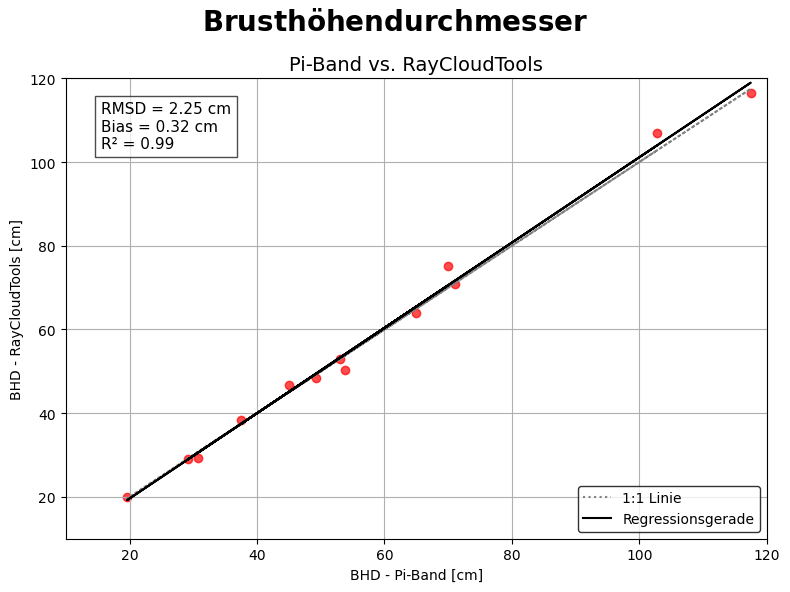

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import json
from sklearn.metrics import mean_squared_error, r2_score
from scipy.stats import pearsonr

# Datei mit den Daten
data_file = "data.json"

# Daten laden
def load_data():
    with open(data_file, "r") as file:
        return json.load(file)

data = load_data()

# Daten extrahieren
baumkataster = [value[0] for value in data.values()]
pi_band = [value[1] for value in data.values()]
rct = [value[2] for value in data.values()]

# Funktion zur Berechnung statistischen Kennwerten
def calculate_metrics(data1, data2):
    rmse = np.sqrt(mean_squared_error(data1, data2))
    correlation, _ = pearsonr(data1, data2)
    r2 = r2_score(data1, data2)
    bias = np.mean(np.array(data2) - np.array(data1))
    return rmse, correlation, r2, bias

rmse_pb_rct, corr_pb_rct, r2_pb_rct, bias_pb_rct = calculate_metrics(pi_band, rct)

# Hauptplot mit Überschrift
fig, ax = plt.subplots(figsize=(8, 6))
fig.suptitle(r"$\bf{Brusth\"ohendurchmesser}$", fontsize=20, ha='center')

# Plot: Pi-Band vs. raycloudtools
ax.scatter(pi_band, rct, color='red', alpha=0.7)
ax.set_title("Pi-Band vs. RayCloudTools", fontsize=14)
ax.set_xlabel("BHD - Pi-Band [cm]")
ax.set_ylabel("BHD - RayCloudTools [cm]")
ax.grid()
ax.set_xlim(10, 120)
ax.set_ylim(10, 120)

# Regressionsgerade und 1:1 Linie
slope_pb_rct, intercept_pb_rct = np.polyfit(pi_band, rct, 1)
regression_line_pb_rct = np.polyval([slope_pb_rct, intercept_pb_rct], pi_band)

ax.plot(pi_band, pi_band, color='grey', linestyle=':', label="1:1 Linie")
ax.plot(pi_band, regression_line_pb_rct, color='black', linestyle='-', label="Regressionsgerade")

# Statistische Kennwerte im Plot anzeigen
ax.text(0.05, 0.95, f"RMSD = {rmse_pb_rct:.2f} cm\n"
                    f"Bias = {bias_pb_rct:.2f} cm\n"
                    f"R² = {r2_pb_rct:.2f}",
        transform=ax.transAxes, fontsize=11, verticalalignment='top', bbox=dict(facecolor='white', alpha=0.7))

ax.legend(loc='lower right', edgecolor='black')
plt.tight_layout()
plt.savefig("BHD_separat.png", dpi=300)
plt.show()
